In [3]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import random as rand 

from ECFM_NN_helpers import * 
from tensorflow import keras 
from numpy import genfromtxt
from sklearn.linear_model import LinearRegression

In [4]:
matrix_file = 'ECFM_Inputs/ECFM_matrix.csv'
frequency_file = 'ECFM_Inputs/ECFM_freq.csv'
position_file = 'ECFM_Inputs/ECFM_rad.csv'

A = np.transpose(np.vectorize(lambda t:complex(t.replace('i','j'))) (genfromtxt(matrix_file, delimiter=',',dtype='str')))
rad_pos = np.loadtxt(position_file, delimiter=',') # m
freq = np.loadtxt(frequency_file, delimiter=',') # Hz 

num_sens = A.shape[0]
num_vel = A.shape[1]

actual_velocity_profile = np.array([1.3, 1.2, 1.15, 1.1, 1.05, 1, .95]) # m / s 
b = np.matmul(A, actual_velocity_profile)
sensitivity_correct =  1e-3 * np.array([0.0625, 0.1518, 0.2757, 0.3999, 0.4044, 0.3620, 0.3104, 0.2627, 0.2222, 0.1887, 0.1613, 0.1390, 0.0993, 0.0747, 0.0475])
sensitivity = np.abs(b) # V


In [5]:
min_vel = 0
max_vel = 5
size = 100
R = 0.012827
min_n = 5
max_n = 10 
train_sensitivity, train_velocity, phases, bs = generate_monotonic_data(A, size, min_vel, max_vel)#, rad_pos, R, min_n, max_n)

Text(0.5, 0, 'Row Number')

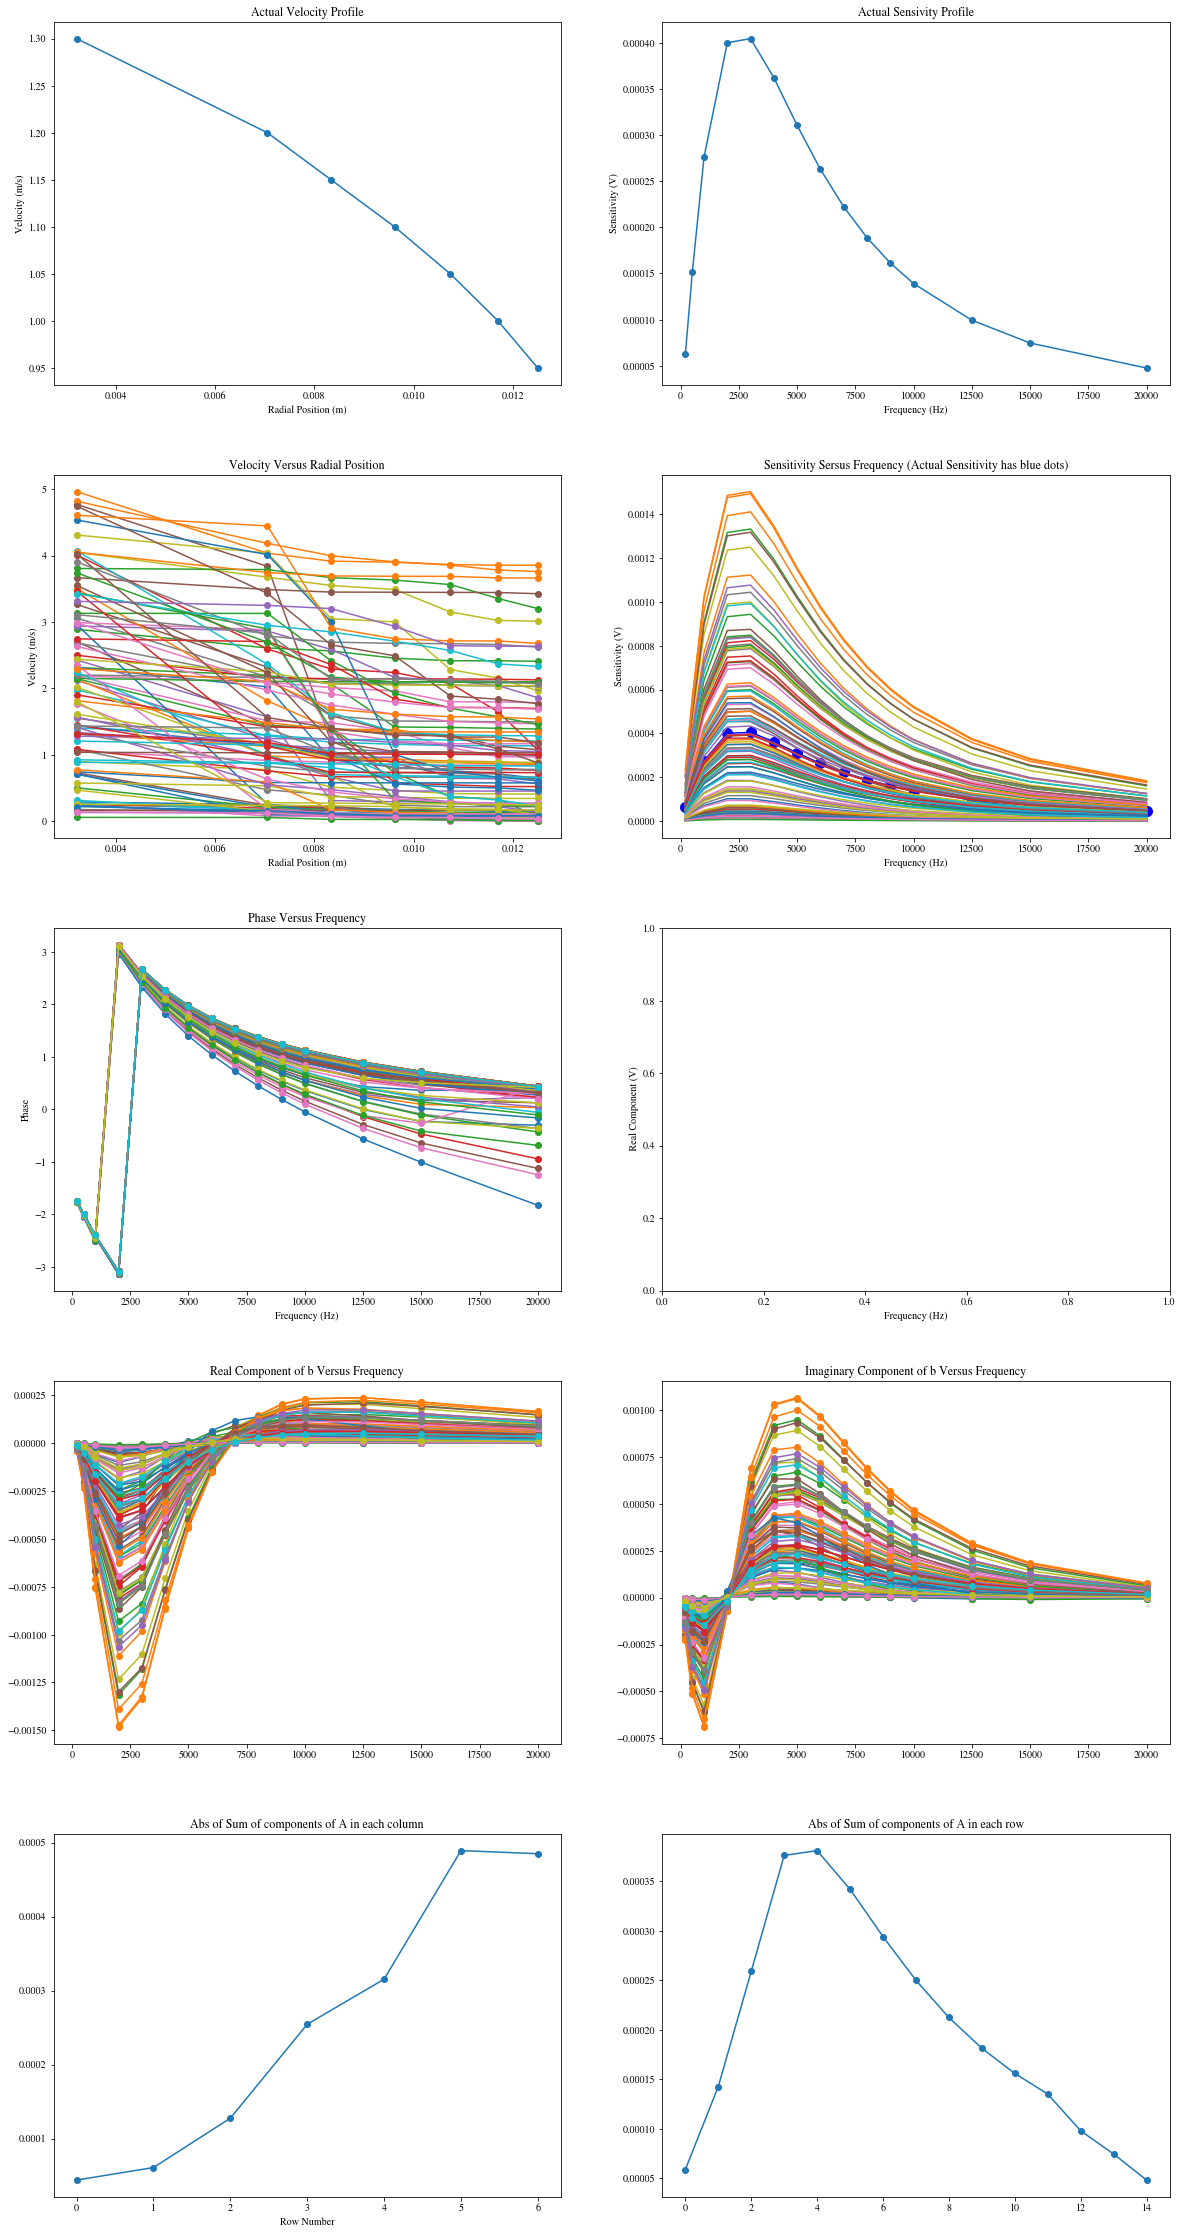

In [6]:
fig = plt.figure(figsize=(20, 40)) 
gs = fig.add_gridspec(5, 2, hspace=0.25)
axs = gs.subplots()
titles = ['Actual Velocity Profile', 'Actual Sensivity Profile',
          'Velocity Versus Radial Position', 'Sensitivity Sersus Frequency (Actual Sensitivity has blue dots)',
          'Phase Versus Frequency', '', #'Real - Imaginary Component of b Versus Frequency',
          'Real Component of b Versus Frequency', 'Imaginary Component of b Versus Frequency',
          'Abs of Sum of components of A in each column', 'Abs of Sum of components of A in each row' 
          ]
ylabels = ['Velocity (m/s)', 'Sensitivity (V)', 
           'Velocity (m/s)', 'Sensitivity (V)', 
           'Phase', ' Real Component (V)', 
           'Imaginary Component (V)', ''
          ]
axs[0, 0].plot(rad_pos, actual_velocity_profile, 'o-')
axs[0, 1].plot(freq, sensitivity, 'o-')
axs[1, 1].plot(freq, sensitivity, 'o-b', markersize=10)
for i in range(size): 
    axs[1, 0].plot(rad_pos, train_velocity[i], 'o-')
    axs[1, 1].plot(freq, train_sensitivity[i], '-')
    axs[2, 0].plot(freq, phases[i], 'o-')
    #axs[1, 1].plot(freq, bs[i].real - bs[i].imag, 'o-') 
    axs[3, 0].plot(freq, bs[i].real, 'o-')
    axs[3, 1].plot(freq, bs[i].imag, 'o-') 
    

column_sum = [] 
row_sum = [] 
for i in range(A.shape[1]):
    column_sum.append(np.abs(np.sum(A[:, i])))
for i in range(A.shape[0]): 
    row_sum.append(np.abs(np.sum(A[i, :])))

for i in range(5): 
    for j in range(2): 
        if i < 2 and j == 0: 
            axs[i, j].set_xlabel('Radial Position (m)')
        elif i < 3: 
            axs[i, j].set_xlabel('Frequency (Hz)')
        axs[i, j].set_title(titles[2 * i + j])
        if i < 3: 
            axs[i, j].set_ylabel(ylabels[2 * i + j])


axs[4, 0].plot(range(num_vel), column_sum, 'o-')
axs[4, 0].set_xlabel('Column Number')

axs[4, 1].plot(range(num_sens), row_sum, 'o-')
axs[4, 0].set_xlabel('Row Number')